# Data Exploration 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline


In [2]:
import os
from huggingface_hub import login 

c:\Users\mosta\anaconda3\envs\SQLtoTEXT\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


 **Load the dataset**

In [3]:
token = os.environ.get("HF_TOKEN")
login(token=token)

In [4]:
from datasets import load_dataset

gretel_dataset = load_dataset("gretelai/synthetic_text_to_sql")

In [5]:
print(gretel_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 5851
    })
})


In [6]:
print(gretel_dataset["train"][0])

{'id': 5097, 'domain': 'forestry', 'domain_description': 'Comprehensive data on sustainable forest management, timber production, wildlife habitat, and carbon sequestration in forestry.', 'sql_complexity': 'single join', 'sql_complexity_description': 'only one join (specify inner, outer, cross)', 'sql_task_type': 'analytics and reporting', 'sql_task_type_description': 'generating reports, dashboards, and analytical insights', 'sql_prompt': 'What is the total volume of timber sold by each salesperson, sorted by salesperson?', 'sql_context': "CREATE TABLE salesperson (salesperson_id INT, name TEXT, region TEXT); INSERT INTO salesperson (salesperson_id, name, region) VALUES (1, 'John Doe', 'North'), (2, 'Jane Smith', 'South'); CREATE TABLE timber_sales (sales_id INT, salesperson_id INT, volume REAL, sale_date DATE); INSERT INTO timber_sales (sales_id, salesperson_id, volume, sale_date) VALUES (1, 1, 120, '2021-01-01'), (2, 1, 150, '2021-02-01'), (3, 2, 180, '2021-01-01');", 'sql': 'SELECT

In [7]:
print(gretel_dataset["train"][0])

{'id': 5097, 'domain': 'forestry', 'domain_description': 'Comprehensive data on sustainable forest management, timber production, wildlife habitat, and carbon sequestration in forestry.', 'sql_complexity': 'single join', 'sql_complexity_description': 'only one join (specify inner, outer, cross)', 'sql_task_type': 'analytics and reporting', 'sql_task_type_description': 'generating reports, dashboards, and analytical insights', 'sql_prompt': 'What is the total volume of timber sold by each salesperson, sorted by salesperson?', 'sql_context': "CREATE TABLE salesperson (salesperson_id INT, name TEXT, region TEXT); INSERT INTO salesperson (salesperson_id, name, region) VALUES (1, 'John Doe', 'North'), (2, 'Jane Smith', 'South'); CREATE TABLE timber_sales (sales_id INT, salesperson_id INT, volume REAL, sale_date DATE); INSERT INTO timber_sales (sales_id, salesperson_id, volume, sale_date) VALUES (1, 1, 120, '2021-01-01'), (2, 1, 150, '2021-02-01'), (3, 2, 180, '2021-01-01');", 'sql': 'SELECT

In [8]:
data = gretel_dataset["train"].to_pandas()

In [9]:
data.head()

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation
0,5097,forestry,Comprehensive data on sustainable forest manag...,single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",What is the total volume of timber sold by eac...,"CREATE TABLE salesperson (salesperson_id INT, ...","SELECT salesperson_id, name, SUM(volume) as to...","Joins timber_sales and salesperson tables, gro..."
1,5098,defense industry,"Defense contract data, military equipment main...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",List all the unique equipment types and their ...,CREATE TABLE equipment_maintenance (equipment_...,"SELECT equipment_type, SUM(maintenance_frequen...",This query groups the equipment_maintenance ta...
2,5099,marine biology,"Comprehensive data on marine species, oceanogr...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",How many marine species are found in the South...,"CREATE TABLE marine_species (name VARCHAR(50),...",SELECT COUNT(*) FROM marine_species WHERE loca...,This query counts the number of marine species...
3,5100,financial services,Detailed financial data including investment s...,aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",What is the total trade value and average pric...,"CREATE TABLE trade_history (id INT, trader_id ...","SELECT trader_id, stock, SUM(price * quantity)...",This query calculates the total trade value an...
4,5101,energy,Energy market data covering renewable energy s...,window functions,"window functions (e.g., ROW_NUMBER, LEAD, LAG,...",analytics and reporting,"generating reports, dashboards, and analytical...",Find the energy efficiency upgrades with the h...,"CREATE TABLE upgrades (id INT, cost FLOAT, typ...","SELECT type, cost FROM (SELECT type, cost, ROW...",The SQL query uses the ROW_NUMBER function to ...


In [10]:
print(data.columns.tolist())

['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']


**EDA**

In [11]:
domain_counts = data["domain"].value_counts().reset_index()
domain_counts = domain_counts[:10]
domain_counts.columns = ["domain", "count"]
print(domain_counts.head())

                       domain  count
0             ethical fashion   1368
1               cybersecurity   1360
2           rural development   1357
3                 hospitality   1296
4  sustainable infrastructure   1266


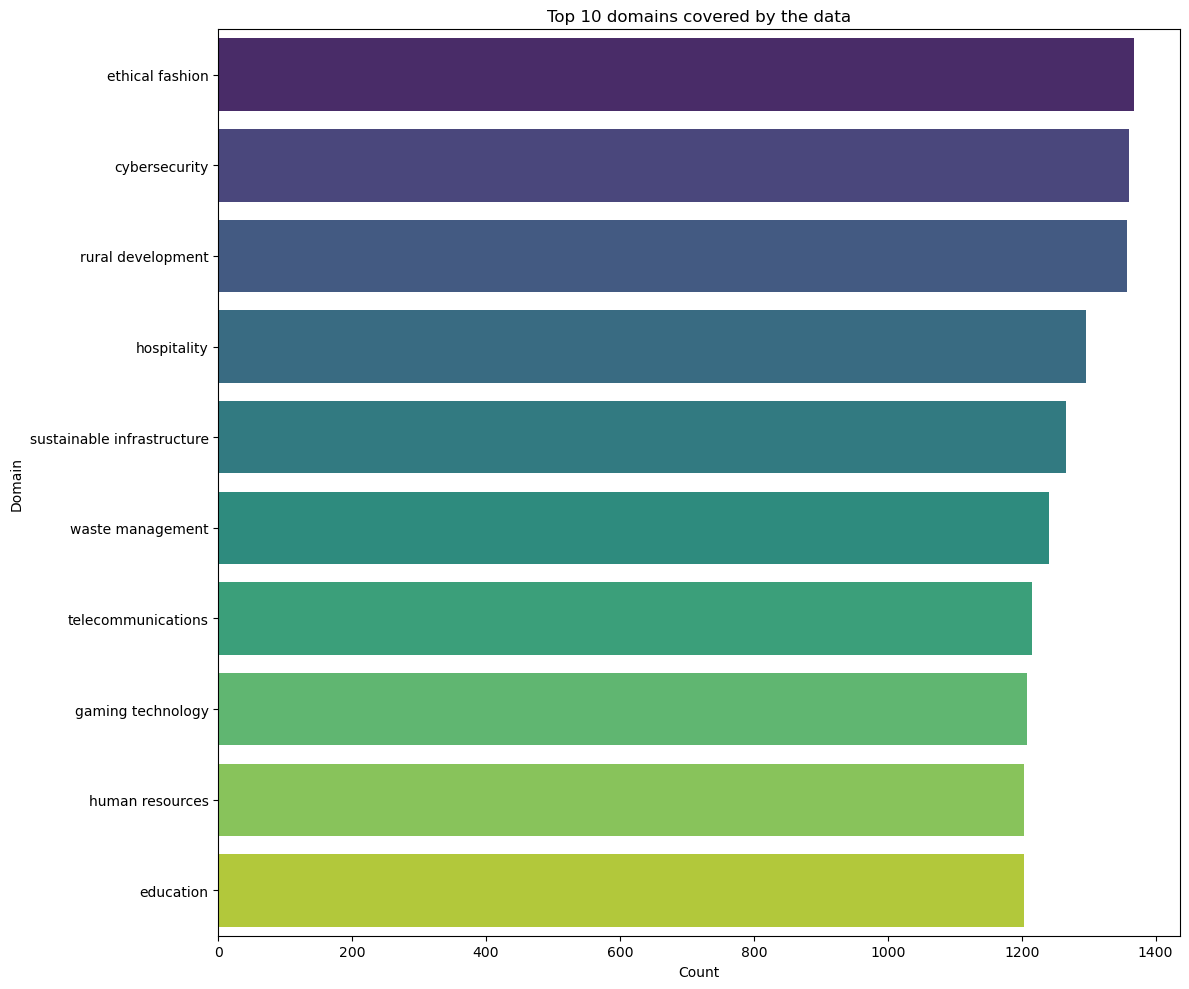

In [12]:
plt.figure(figsize=(12, 10))
sns.barplot(
    data=domain_counts, 
    x="count", 
    y="domain", 
    orient="h", 
    palette="viridis",
    hue="domain",legend = False  
)
plt.title("Top 10 domains covered by the data")
plt.xlabel("Count")
plt.ylabel("Domain")
plt.tight_layout()
plt.show()

In [13]:
sql_operation = data["sql_complexity"].value_counts().reset_index()
sql_operation.columns = ["operation","count"]

In [14]:
sql_operation.head(len(data.columns.tolist()))

,operation,count
0,basic SQL,48466
1,aggregation,22015
2,single join,14932
3,subqueries,6719
4,window functions,3596
5,multiple_joins,2949
6,set operations,1050
7,CTEs,273


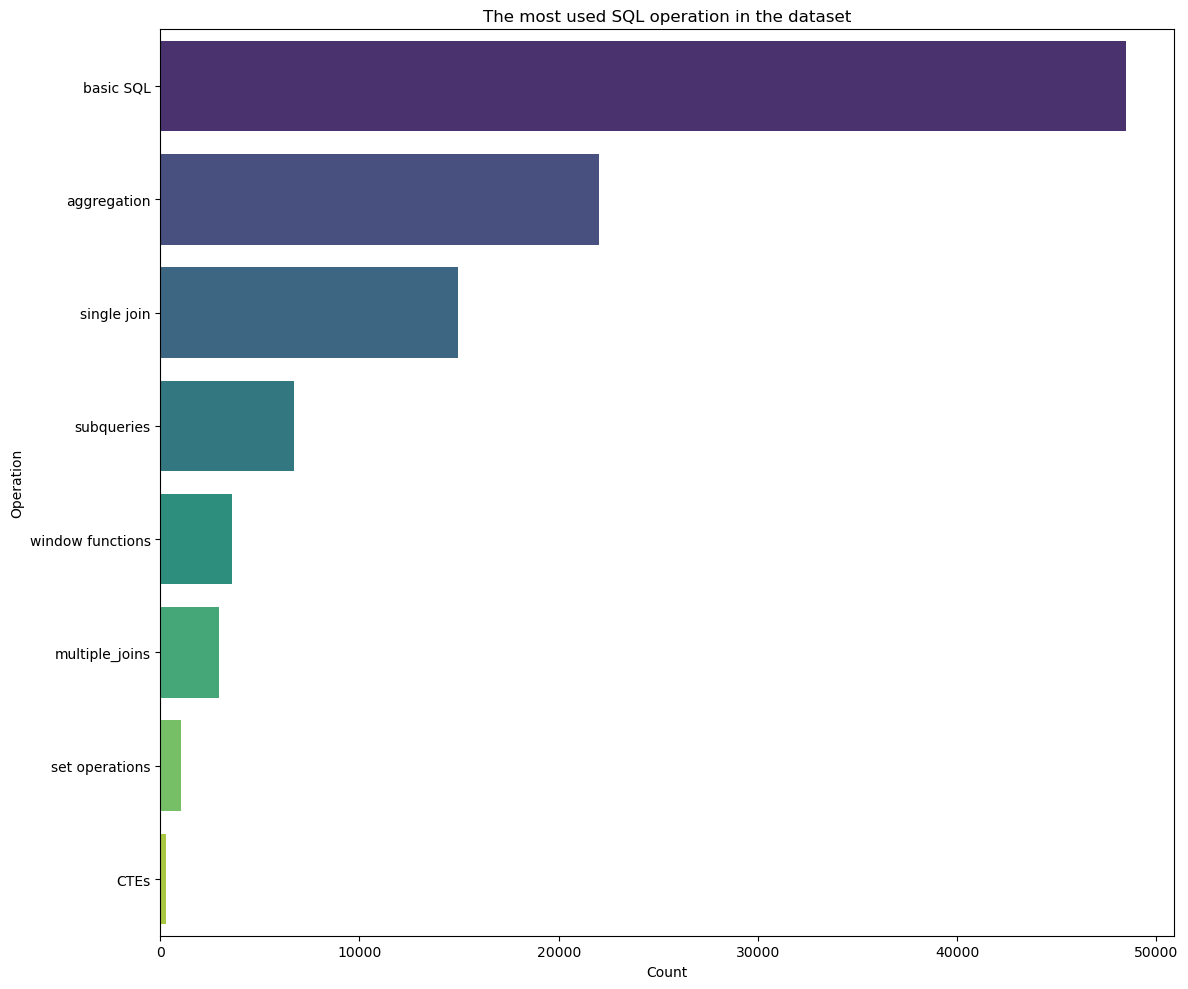

In [15]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=sql_operation, 
    x='count', 
    y="operation", 
    hue="operation",  # Add this line to assign the y variable to hue
    orient="h", 
    palette='viridis',
    legend=False      # Add this to prevent a redundant legend
)
plt.title('The most used SQL operation in the dataset')
plt.xlabel("Count")
plt.ylabel("Operation")
plt.tight_layout()
plt.show()

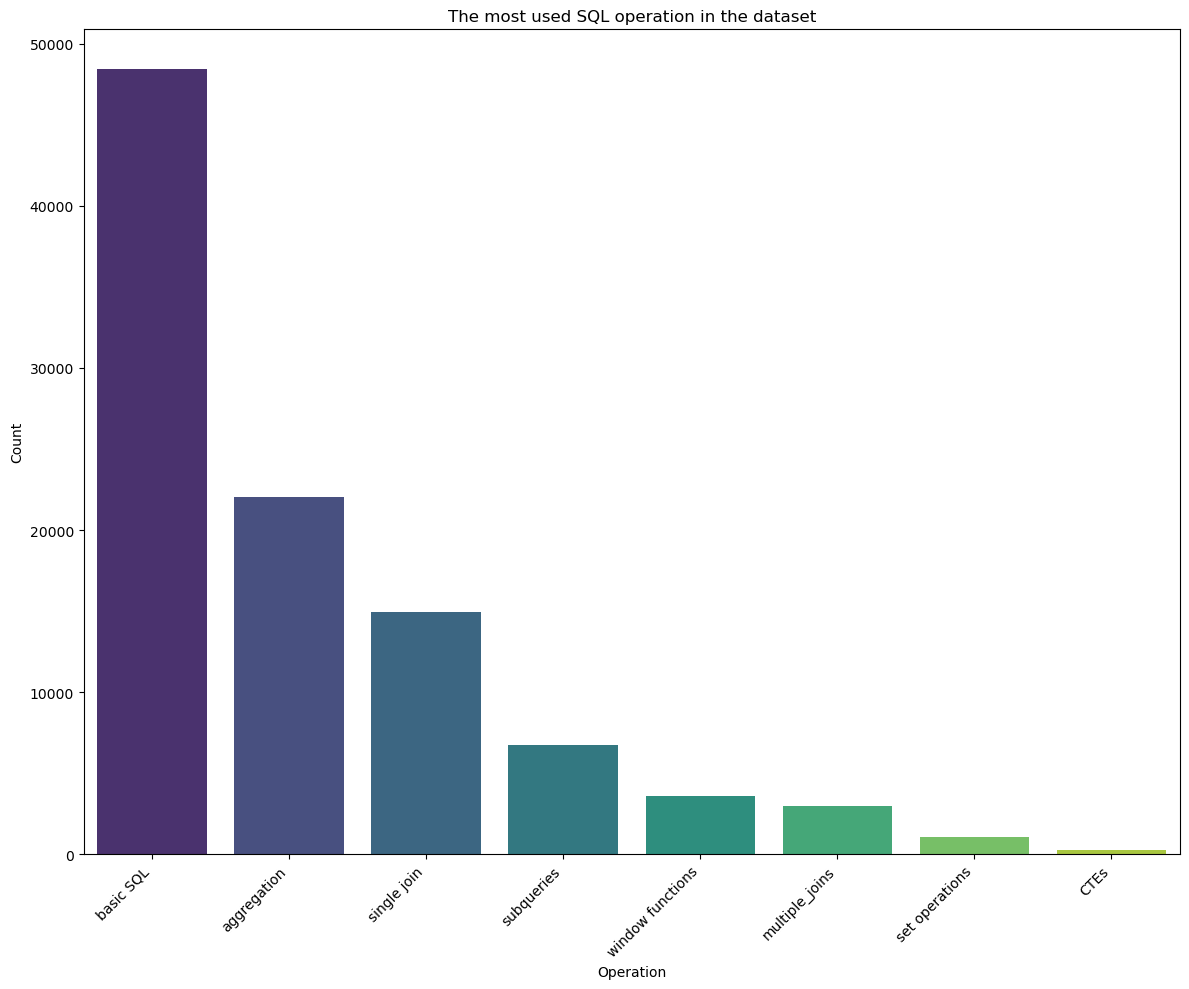

In [16]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=sql_operation, 
    x="operation",  # Swap x and y
    y='count',      # Swap x and y
    hue="operation", 
    orient="v",     # Change to vertical orientation
    palette='viridis',
    legend=False
)
plt.title('The most used SQL operation in the dataset')
plt.xlabel("Operation")  # Swap x and y labels
plt.ylabel("Count")      # Swap x and y labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
sql_tasks = data["sql_task_type"].value_counts().reset_index()
sql_tasks.columns = ["Task Type","count"]

In [18]:
sql_tasks

,Task Type,count
0,analytics and reporting,88186
1,data manipulation,9665
2,data retrieval,1309
3,data definition,840


In [19]:
na_data = data.isna().count().reset_index()
na_data.columns = ["column","Number of na value"]
na_data

,column,Number of na value
0,id,100000
1,domain,100000
2,domain_description,100000
3,sql_complexity,100000
4,sql_complexity_description,100000
5,sql_task_type,100000
6,sql_task_type_description,100000
7,sql_prompt,100000
8,sql_context,100000
9,sql,100000


In [20]:
na_data = data.isna().sum().reset_index()
na_data.columns = ["column", "Number of na values"]
na_data


,column,Number of na values
0,id,0
1,domain,0
2,domain_description,0
3,sql_complexity,0
4,sql_complexity_description,0
5,sql_task_type,0
6,sql_task_type_description,0
7,sql_prompt,0
8,sql_context,0
9,sql,0


In [21]:
train_data = gretel_dataset["train"].to_pandas()

In [22]:
train_data.shape

(100000, 11)

In [23]:
print(train_data[['sql_prompt', 'sql']].sample(4))

                                              sql_prompt  \
63091  What is the total amount donated by corporatio...   
58953  Delete all records in the 'hydro_plants' table...   
94710  What is the total claim amount for each policy...   
73414  Which spacecraft were launched by NASA and wha...   

                                                     sql  
63091  SELECT SUM(AmountDonated) FROM Donors WHERE Co...  
58953  DELETE FROM hydro_plants WHERE country = 'Braz...  
94710  SELECT State, SUM(ClaimAmount) FROM Policyhold...  
73414  SELECT Name, MaxAltitude FROM Spacecraft WHERE...  


In [24]:
data = data[['sql_prompt', 'sql']].dropna().reset_index(drop=True)

In [31]:
os.makedirs("text_to_sql_generator/data/processed", exist_ok=True)
data.to_csv("text_to_sql_generator/data/processed/text2sql_clean.csv", index=False)